In [1]:
import opendatasets as od

# url of the dataset
download_url = 'https://www.kaggle.com/datasets/fatihilhan/electric-vehicle-specifications-and-prices'

od.download(download_url)

Skipping, found downloaded files in ".\electric-vehicle-specifications-and-prices" (use force=True to force download)


## **Importing libraries & Reading Data:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("EV_cars.csv")

## **Sanity Check and Data Cleaning:**

In [4]:
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [5]:
df.shape

(360, 9)

In [6]:
df.duplicated().sum()

0

In [7]:
# as we can see that duplicate car names are present
for i in df.select_dtypes(include="object").columns:
    print(f"THE NAME OF THE COLUMN IS: {i}")
    print(df[i].value_counts()[:10])
    print("-----------------------------------------------------------")

THE NAME OF THE COLUMN IS: Car_name
Car_name
Mercedes EQB 300 4MATIC        2
Mini Cooper SE                 2
Mercedes EQE SUV 500 4MATIC    2
Mercedes EQA 300 4MATIC        2
Mercedes EQA 250+              2
Mercedes EQE SUV 350 4MATIC    2
Mercedes EQB 350 4MATIC        2
Tesla Model Y                  2
Mercedes EQA 350 4MATIC        2
NIO EL7 100 kWh                1
Name: count, dtype: int64
-----------------------------------------------------------
THE NAME OF THE COLUMN IS: Car_name_link
Car_name_link
https://ev-database.org/car/1619/Tesla-Model-Y-Long-Range-Dual-Motor    1
https://ev-database.org/car/1328/Fiat-500e-3plus1-42-kWh                1
https://ev-database.org/car/1898/Mercedes-EQE-350                       1
https://ev-database.org/car/1814/ORA-Funky-Cat-63-kWh                   1
https://ev-database.org/car/2042/Nissan-Townstar-EV-Passenger           1
https://ev-database.org/car/1950/Volvo-EX90-Single-Motor                1
https://ev-database.org/car/1989/Mercede

In [8]:
for i in ["Mercedes EQB 300 4MATIC", "Mini Cooper SE", "Mercedes EQE SUV 500 4MATIC", "Mercedes EQA 300 4MATIC", "Mercedes EQA 250+", "Mercedes EQE SUV 350 4MATIC", "Mercedes EQB 350 4MATIC", "Tesla Model Y", "Mercedes EQA 350 4MATIC"]:
    print(df[ df["Car_name"] ==  i])
    print("-------------------------------------------------------")

     Battery                 Car_name  \
111     66.5  Mercedes EQB 300 4MATIC   
241     66.5  Mercedes EQB 300 4MATIC   

                                         Car_name_link  Efficiency  \
111  https://ev-database.org/car/1559/Mercedes-EQB-...         196   
241  https://ev-database.org/car/1989/Mercedes-EQB-...         193   

     Fast_charge  Price.DE.  Range  Top_speed  acceleration..0.100.  
111        490.0        NaN    340        160                   8.0  
241        500.0    55519.0    345        160                   8.0  
-------------------------------------------------------
     Battery        Car_name                                    Car_name_link  \
52      28.9  Mini Cooper SE  https://ev-database.org/car/1409/Mini-Cooper-SE   
161     49.0  Mini Cooper SE  https://ev-database.org/car/1998/Mini-Cooper-SE   

     Efficiency  Fast_charge  Price.DE.  Range  Top_speed  \
52          161        260.0    35700.0    180        150   
161         158        440.0    3

In [9]:
# treating duplicate car names.
# dropping the rows where there are nan price values

index_to_drop = [111, 52, 203, 201, 61, 173, 82, 179, 72]
for i in index_to_drop:
    df.drop(index=i, inplace=True)

In [10]:
# duplicate values are treated
for i in df.select_dtypes(include="object").columns:
    print(f"THE NAME OF THE COLUMN IS: {i}")
    print(df[i].value_counts()[:10])
    print("-----------------------------------------------------------")

THE NAME OF THE COLUMN IS: Car_name
Car_name
Tesla Model Y Long Range Dual Motor    1
Polestar 2 Long Range Performance      1
Audi Q4 e-tron 45 quattro              1
Fiat 500e 3+1 42 kWh                   1
Audi Q8 e-tron Sportback 50 quattro    1
Mercedes EQE 350                       1
ORA Funky Cat 63 kWh                   1
Nissan Townstar EV Passenger           1
Volvo EX90 Single Motor                1
Mercedes EQB 300 4MATIC                1
Name: count, dtype: int64
-----------------------------------------------------------
THE NAME OF THE COLUMN IS: Car_name_link
Car_name_link
https://ev-database.org/car/1619/Tesla-Model-Y-Long-Range-Dual-Motor    1
https://ev-database.org/car/1820/Polestar-2-Long-Range-Performance      1
https://ev-database.org/car/2014/Audi-Q4-e-tron-45-quattro              1
https://ev-database.org/car/1328/Fiat-500e-3plus1-42-kWh                1
https://ev-database.org/car/1771/Audi-Q8-e-tron-Sportback-50-quattro    1
https://ev-database.org/car/1898/M

In [11]:
df.isnull().sum()

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               44
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64

In [12]:
# using knn imputer to treat the remaining missing values. we can also fill the missing price values with median.

# knn imputer takes average of the nearest value and fill the missing value with the average of the missing value:
from sklearn.impute import KNNImputer
impute = KNNImputer()

for i in ["Fast_charge", "Price.DE."]:
    df[i] = impute.fit_transform(df[ [i] ])

In [13]:
df.isnull().sum()

Battery                 0
Car_name                0
Car_name_link           0
Efficiency              0
Fast_charge             0
Price.DE.               0
Range                   0
Top_speed               0
acceleration..0.100.    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery               351 non-null    float64
 1   Car_name              351 non-null    object 
 2   Car_name_link         351 non-null    object 
 3   Efficiency            351 non-null    int64  
 4   Fast_charge           351 non-null    float64
 5   Price.DE.             351 non-null    float64
 6   Range                 351 non-null    int64  
 7   Top_speed             351 non-null    int64  
 8   acceleration..0.100.  351 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 27.4+ KB


In [15]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [16]:
# renaming the columns for easier manipulation
df.rename(columns={"Fast_charge": "FastCharge", "Price.DE.": "Price", "acceleration..0.100.": "AccelerationTime", "Car_name": "CarName", "Top_speed": "TopSpeed", "Car_name_link": "CarLink"}, inplace=True)

In [17]:
df.columns

Index(['Battery', 'CarName', 'CarLink', 'Efficiency', 'FastCharge', 'Price',
       'Range', 'TopSpeed', 'AccelerationTime'],
      dtype='object')

## **Statistical Summary:**

In [18]:
df.describe()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,71.296296,195.387464,553.409742,67431.260586,370.085470,181.037037,7.298575
std,20.458359,32.170675,238.169462,32310.082183,108.042947,36.455002,3.038848
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,46990.000000,295.000000,155.000000,4.900000
50%,71.000000,188.000000,520.000000,59640.000000,380.000000,180.000000,6.700000
75%,85.000000,209.000000,680.000000,70137.500000,450.000000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000


In [19]:
df.describe(include="object").T

,count,unique,top,freq
CarName,351,351,Tesla Model Y Long Range Dual Motor,1
CarLink,351,351,https://ev-database.org/car/1619/Tesla-Model-Y...,1


## **Univariate Analysis:**

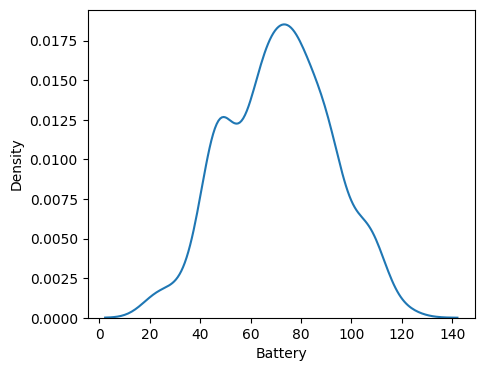

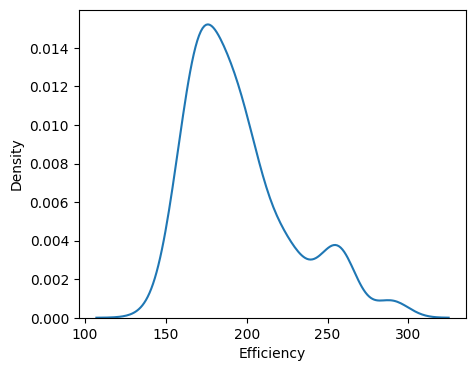

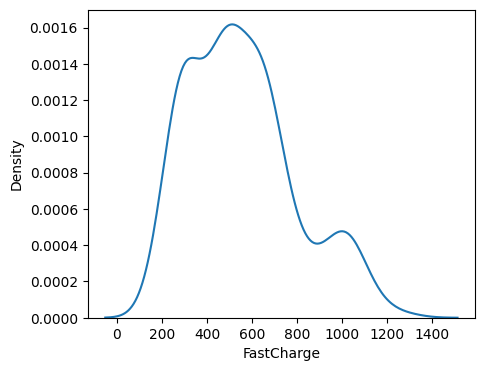

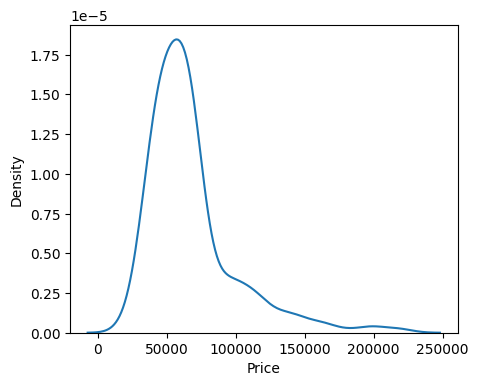

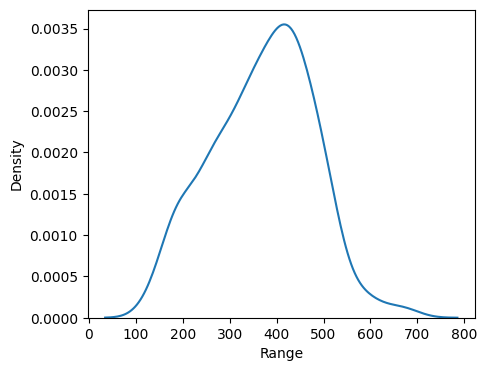

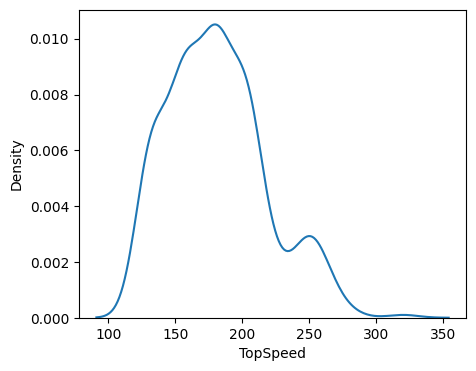

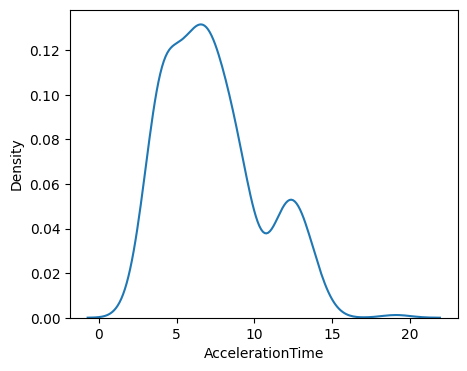

In [20]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(data=df, x=i)
    plt.show

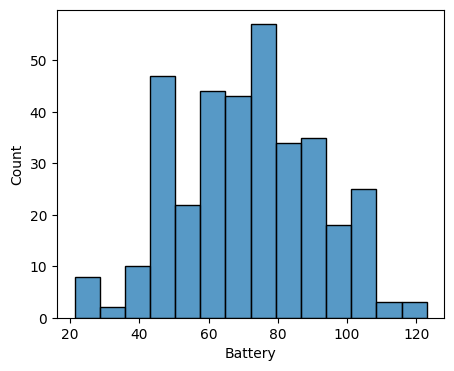

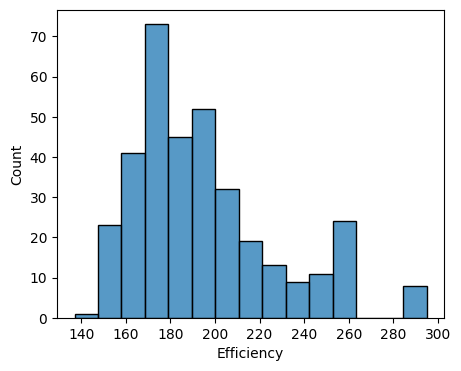

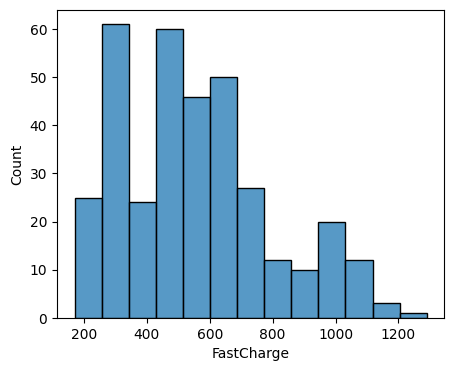

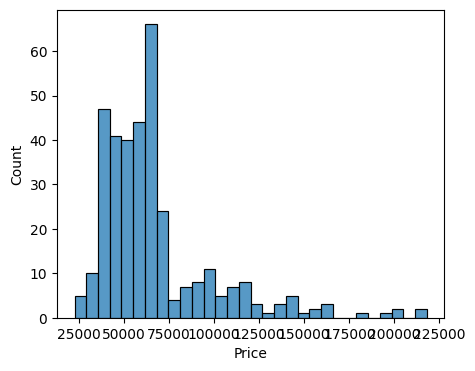

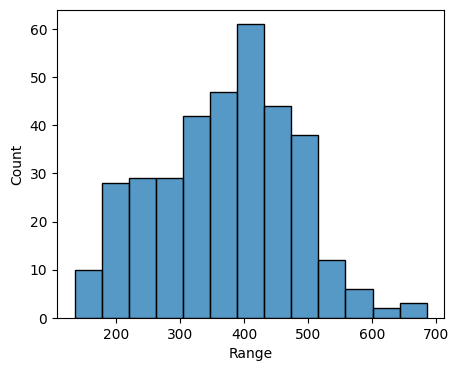

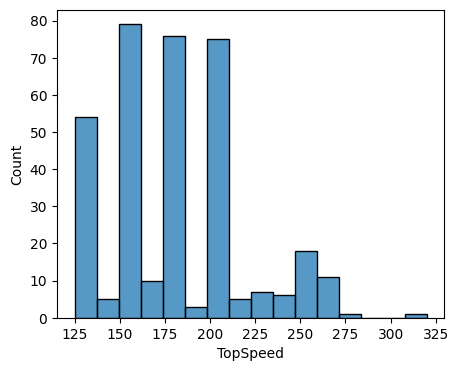

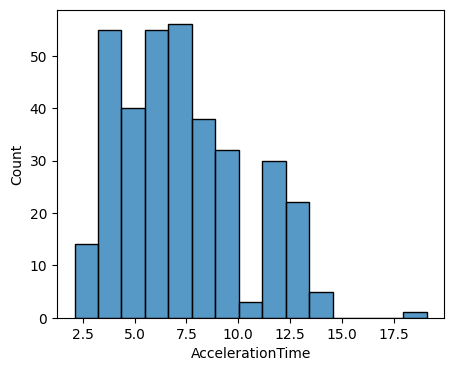

In [21]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.histplot(data=df, x=i)
    plt.show

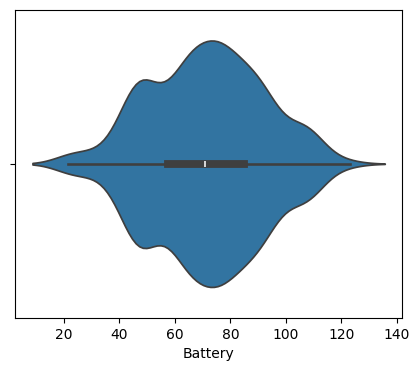

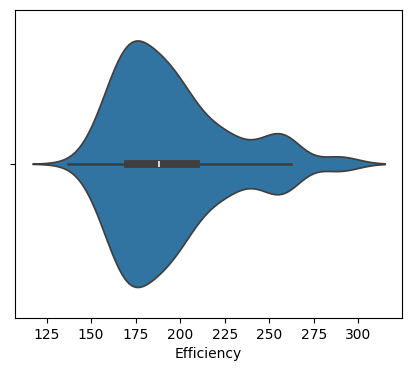

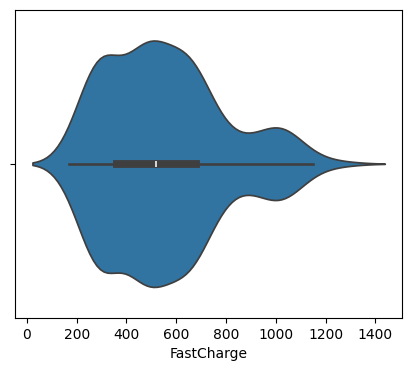

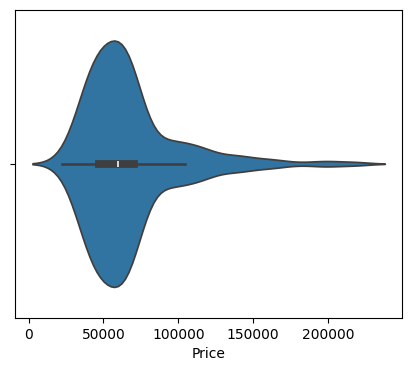

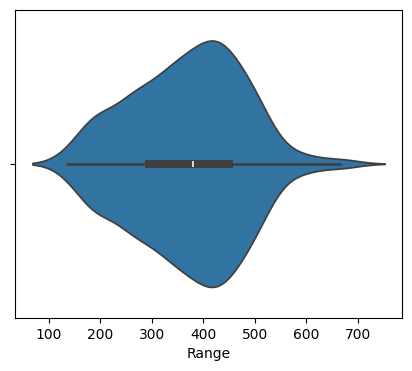

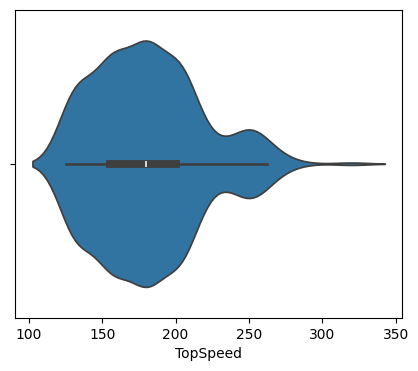

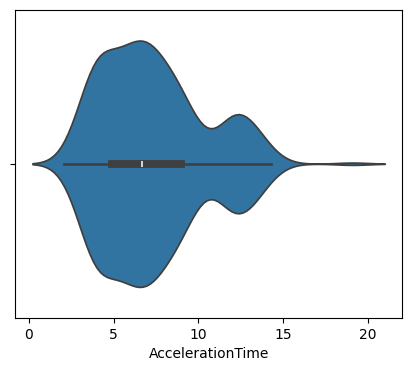

In [22]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.violinplot(data=df, x=i)
    plt.show

## **Bivariate/Multivariate Analysis:**

In [23]:
df.select_dtypes(include="number").columns

Index(['Battery', 'Efficiency', 'FastCharge', 'Price', 'Range', 'TopSpeed',
       'AccelerationTime'],
      dtype='object')

<Figure size 500x400 with 0 Axes>

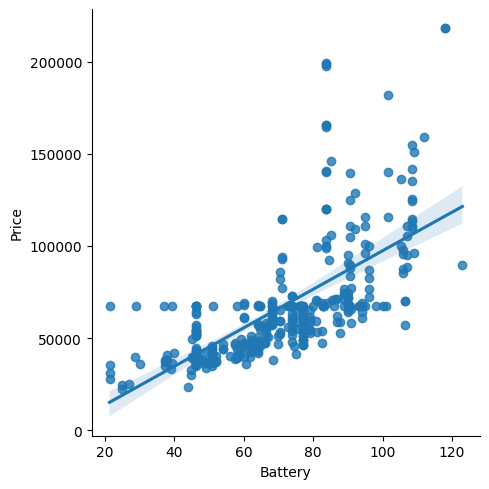

<Figure size 500x400 with 0 Axes>

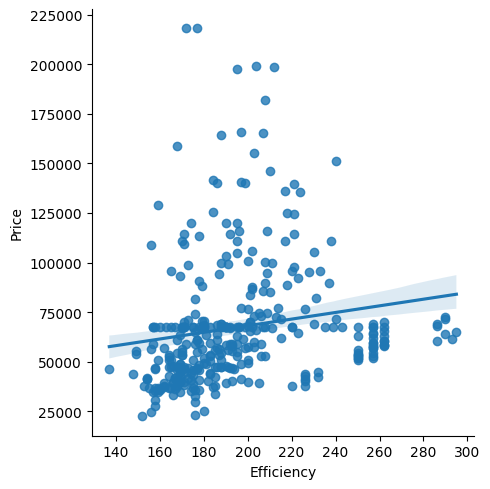

<Figure size 500x400 with 0 Axes>

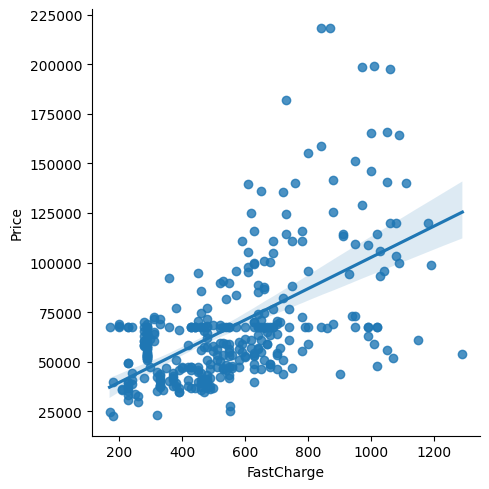

<Figure size 500x400 with 0 Axes>

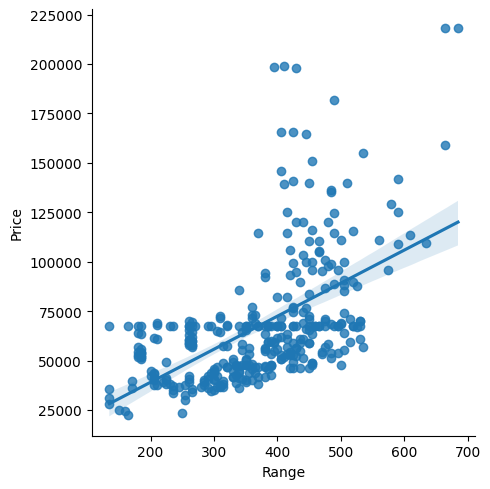

<Figure size 500x400 with 0 Axes>

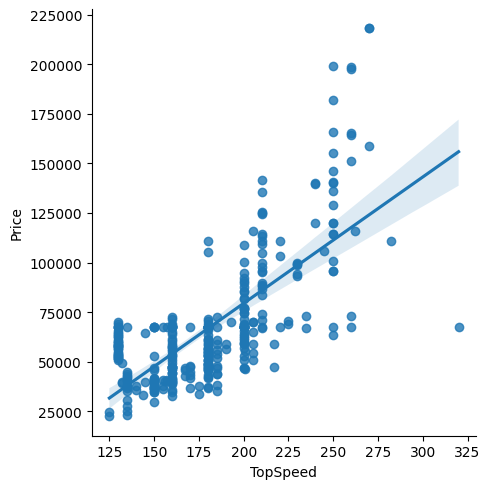

<Figure size 500x400 with 0 Axes>

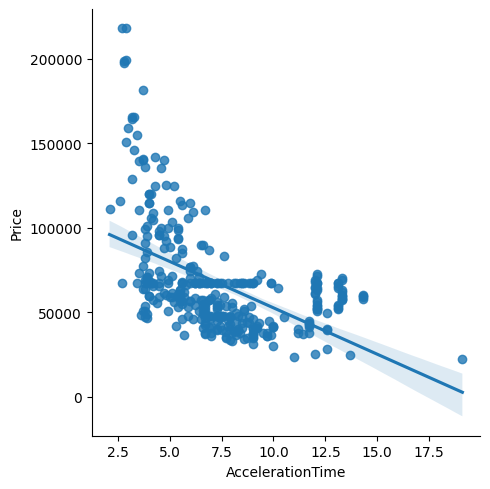

In [24]:
for i in ['Battery', 'Efficiency', 'FastCharge', 'Range', 'TopSpeed',
       'AccelerationTime']:
    plt.figure(figsize=(5, 4))
    sns.lmplot(x=i, y="Price", data=df)
    plt.show

In [25]:
df.select_dtypes(include="number").corr()

,Battery,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
Battery,1.000000,0.169338,0.589598,0.661295,0.881313,0.700544,-0.614768
Efficiency,0.169338,1.000000,-0.283773,0.166420,-0.291247,-0.181978,0.393732
FastCharge,0.589598,-0.283773,1.000000,0.580824,0.711900,0.772678,-0.669583
Price,0.661295,0.166420,0.580824,1.000000,0.558507,0.718244,-0.516473
Range,0.881313,-0.291247,0.711900,0.558507,1.000000,0.746521,-0.749555
TopSpeed,0.700544,-0.181978,0.772678,0.718244,0.746521,1.000000,-0.843735
AccelerationTime,-0.614768,0.393732,-0.669583,-0.516473,-0.749555,-0.843735,1.000000


<Axes: >

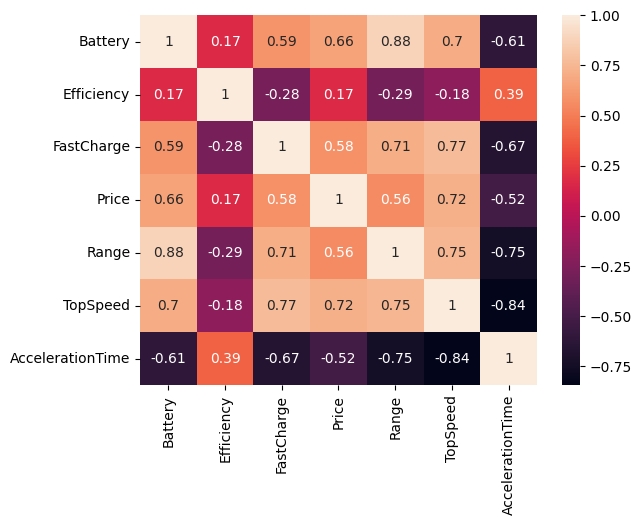

In [26]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

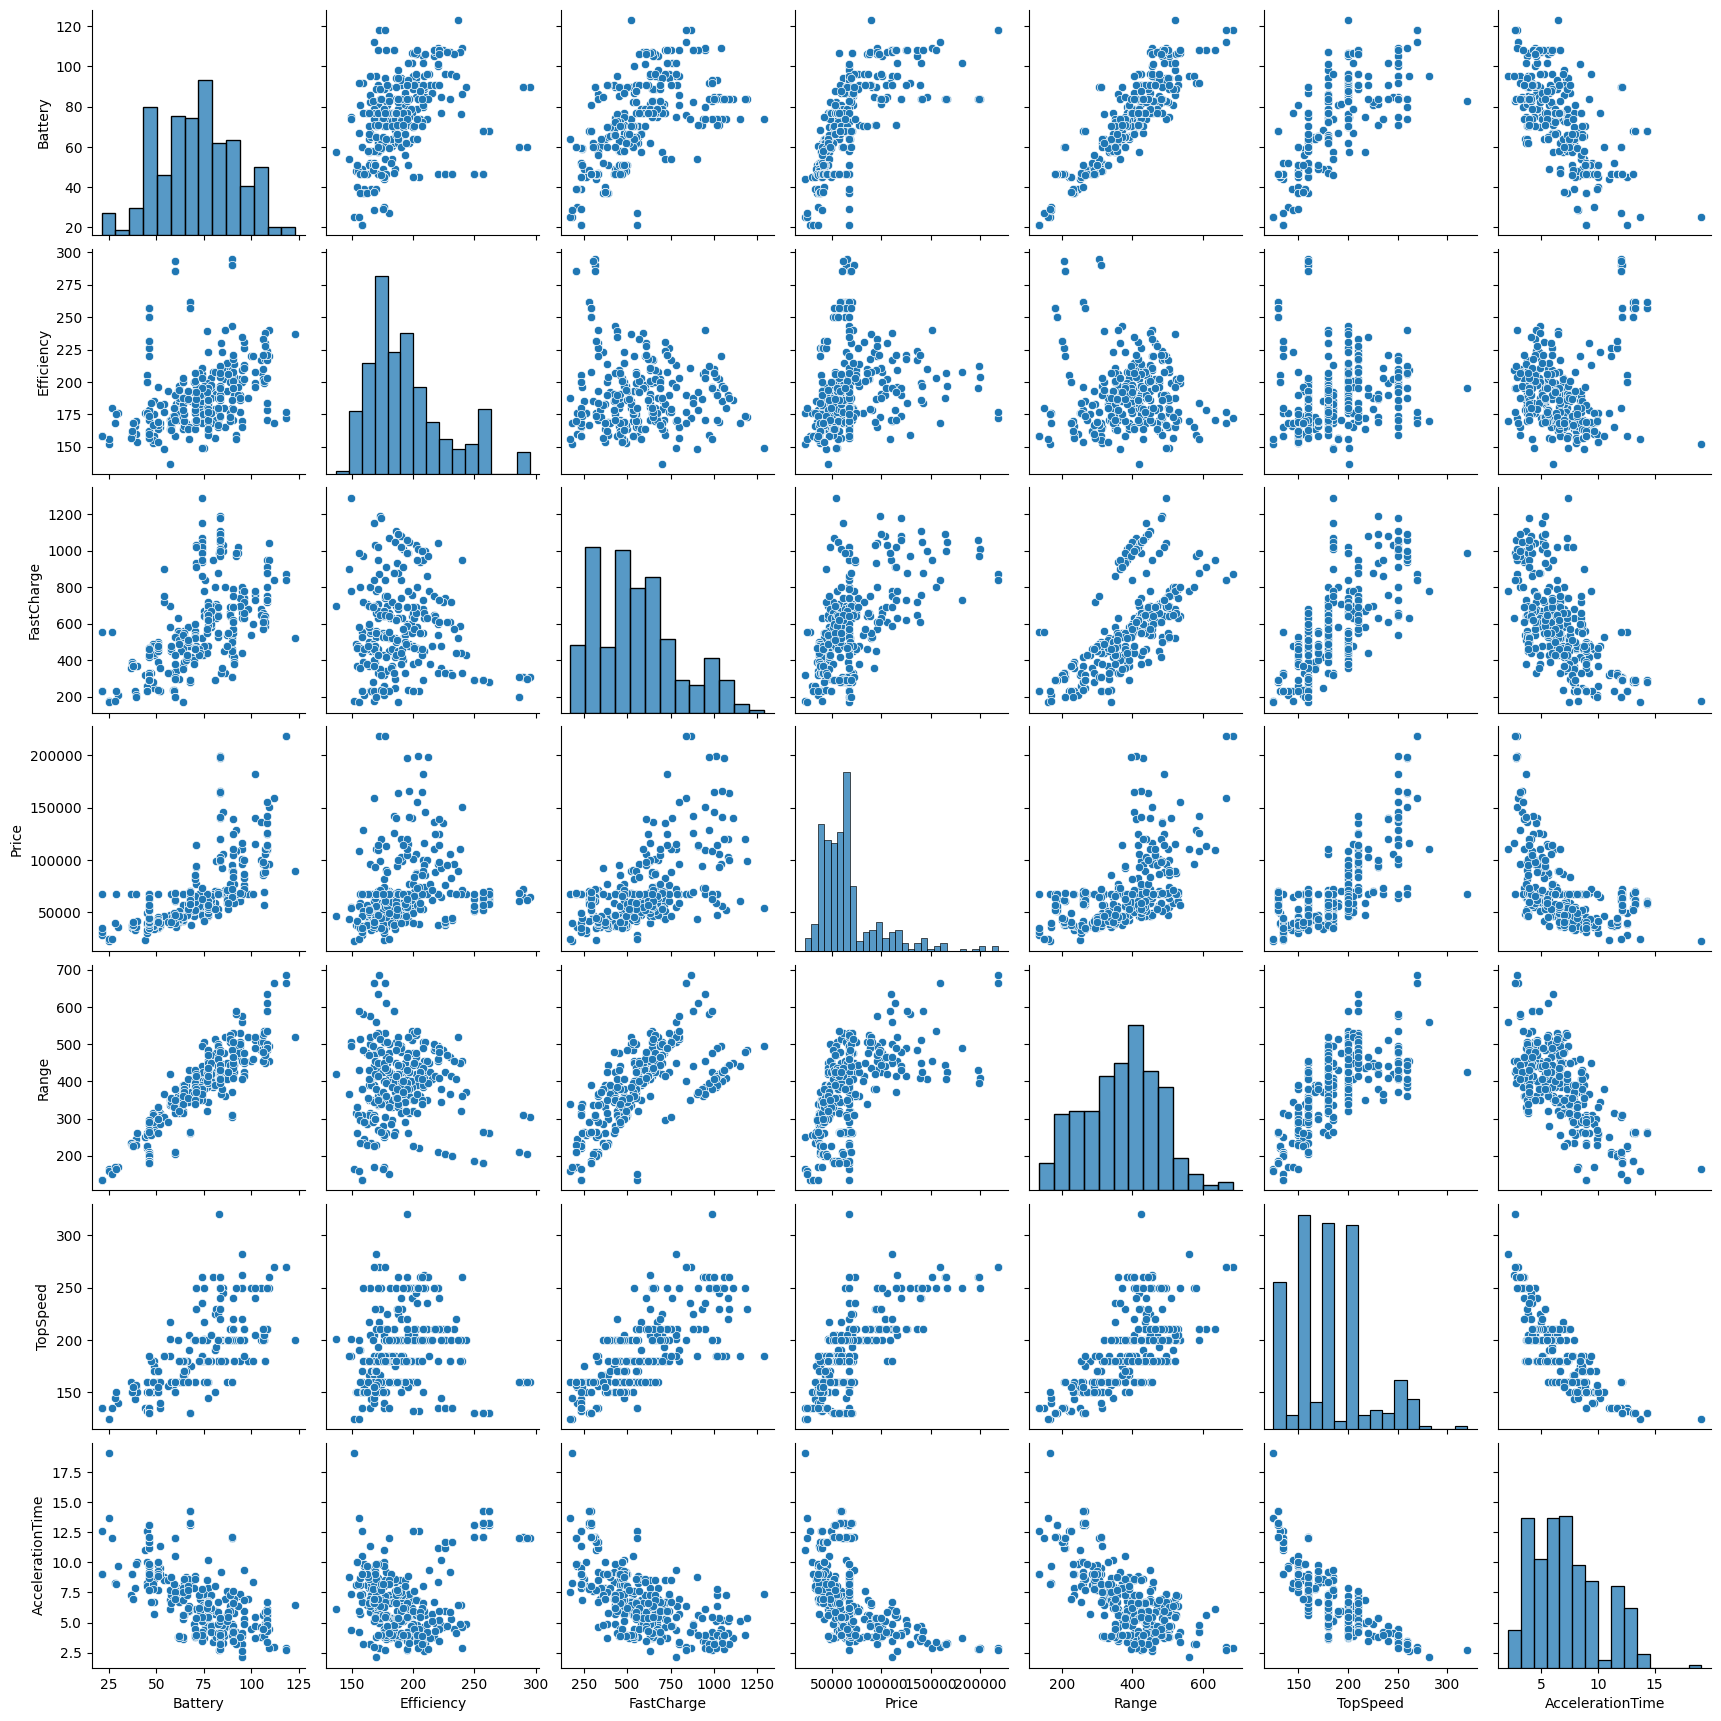

In [27]:
sns.pairplot(df.select_dtypes(include="number"))
plt.show()

## **Outlier Detection and handling:**

In [33]:
df.head()

,Battery,CarName,CarLink,Efficiency,FastCharge,Price,Range,TopSpeed,AccelerationTime
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


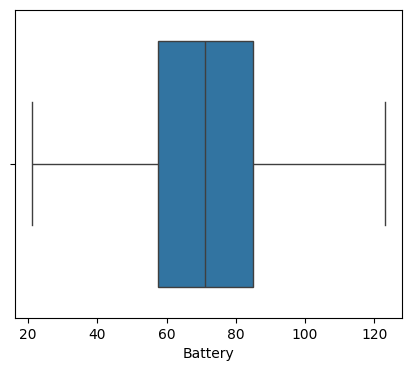

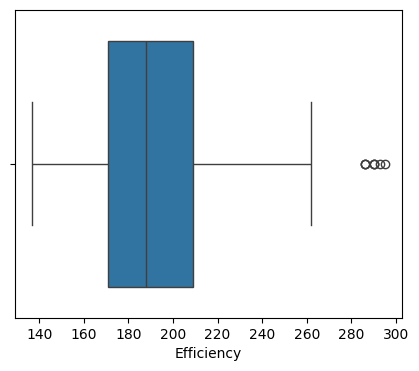

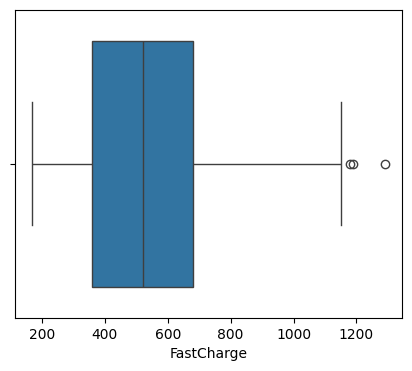

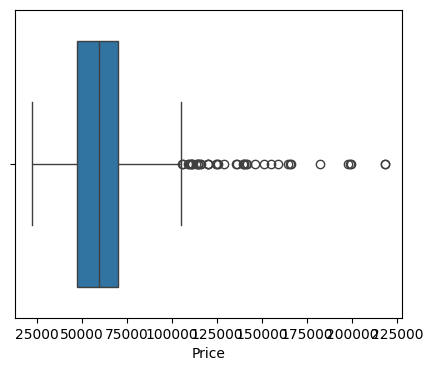

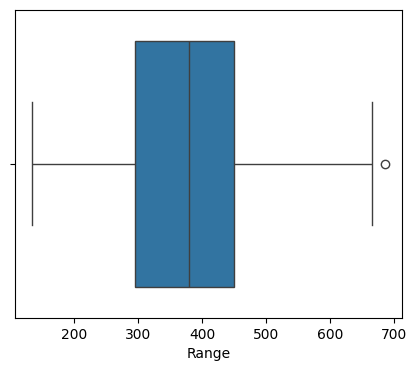

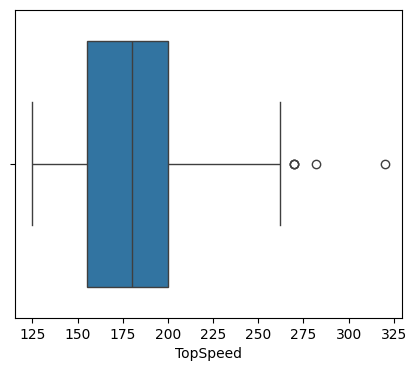

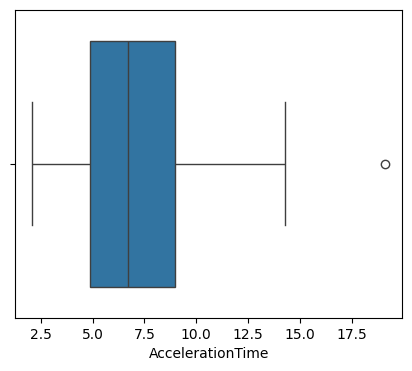

In [34]:
# no outliers are present in this dataset
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df, x=i)
    plt.show()

## **Documentaton of insights obtained while performing EDA:**

In [35]:
# treated duplicate car names
# treated remaning missing values in numerical columns
# no outliers found
# price is the dependent variable in this dataset